## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Define Dataset

In [2]:
df = pd.read_csv("breast-cancer.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

## Apply EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- **Categorical Column**:  
  The dataset contains one categorical column, **`diagnosis`**, which requires encoding.

- **Null Values**:  
  There are no null values in the dataset, so imputation is not needed.


In [4]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Drop id column

In [6]:
df.drop('id', axis = 1, inplace = True)

#### Drop duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

The data_scaled_scaled has no duplicates

#### Numerical columns statistics

In [8]:
df.iloc[:, 0:11].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  
count     569.000000              569.000000  
mean        0.181162                0.062798  
std         0.027414                0.007060  
min         0.106000                0.049960  
25%         0.161900                0.057700  
50%         0.179200                0.061540  
75%         0.195700                0.066120  
max         0.304000                0.097440

In [9]:
df.iloc[:, 11:21].describe()

radius_se  texture_se  perimeter_se     area_se  smoothness_se  \
count  569.000000  569.000000    569.000000  569.000000     569.000000   
mean     0.405172    1.216853      2.866059   40.337079       0.007041   
std      0.277313    0.551648      2.021855   45.491006       0.003003   
min      0.111500    0.360200      0.757000    6.802000       0.001713   
25%      0.232400    0.833900      1.606000   17.850000       0.005169   
50%      0.324200    1.108000      2.287000   24.530000       0.006380   
75%      0.478900    1.474000      3.357000   45.190000       0.008146   
max      2.873000    4.885000     21.980000  542.200000       0.031130   

       compactness_se  concavity_se  concave points_se  symmetry_se  \
count      569.000000    569.000000         569.000000   569.000000   
mean         0.025478      0.031894           0.011796     0.020542   
std          0.017908      0.030186           0.006170     0.008266   
min          0.002252      0.000000           0.000000     0.007882   
25%          0.013080      0.015090           0.007638     0.015160   
50%          0.020450      0.025890           0.010930     0.018730   
75%          0.032450      0.042050           0.014710     0.023480   
max          0.135400      0.396000           0.052790     0.078950   

       fractal_dimension_se  
count            569.000000  
mean               0.003795  
std                0.002646  
min                0.000895  
25%                0.002248  
50%                0.003187  
75%                0.004558  
max                0.029840

In [10]:
df.iloc[:, 21:].describe()

radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500

- **data_scaled Observations**

    No negative values

    Some columns have high variation, others have low variation

## Data Preprocessing

### Encode categorical columns

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

This is the target class:

M for Malignant

B for Benign

In [12]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

1 for Malignant


0 for Benign

### Drop the target column

In [13]:
data = df.drop('diagnosis', axis=1)

The target column is dropped to examine the relationships among the features

### Standardize the data

In [14]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # This returns a NumPy array

# Convert back to DataFrame to retain column names
data = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)


### Correlation

Correlation matrix describes the strength and the direction of the linear relationship between the features

#### Correlation Matrix

In [15]:
corr_matrix = data.corr()
corr_matrix

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

#### Plot correlation heatmap

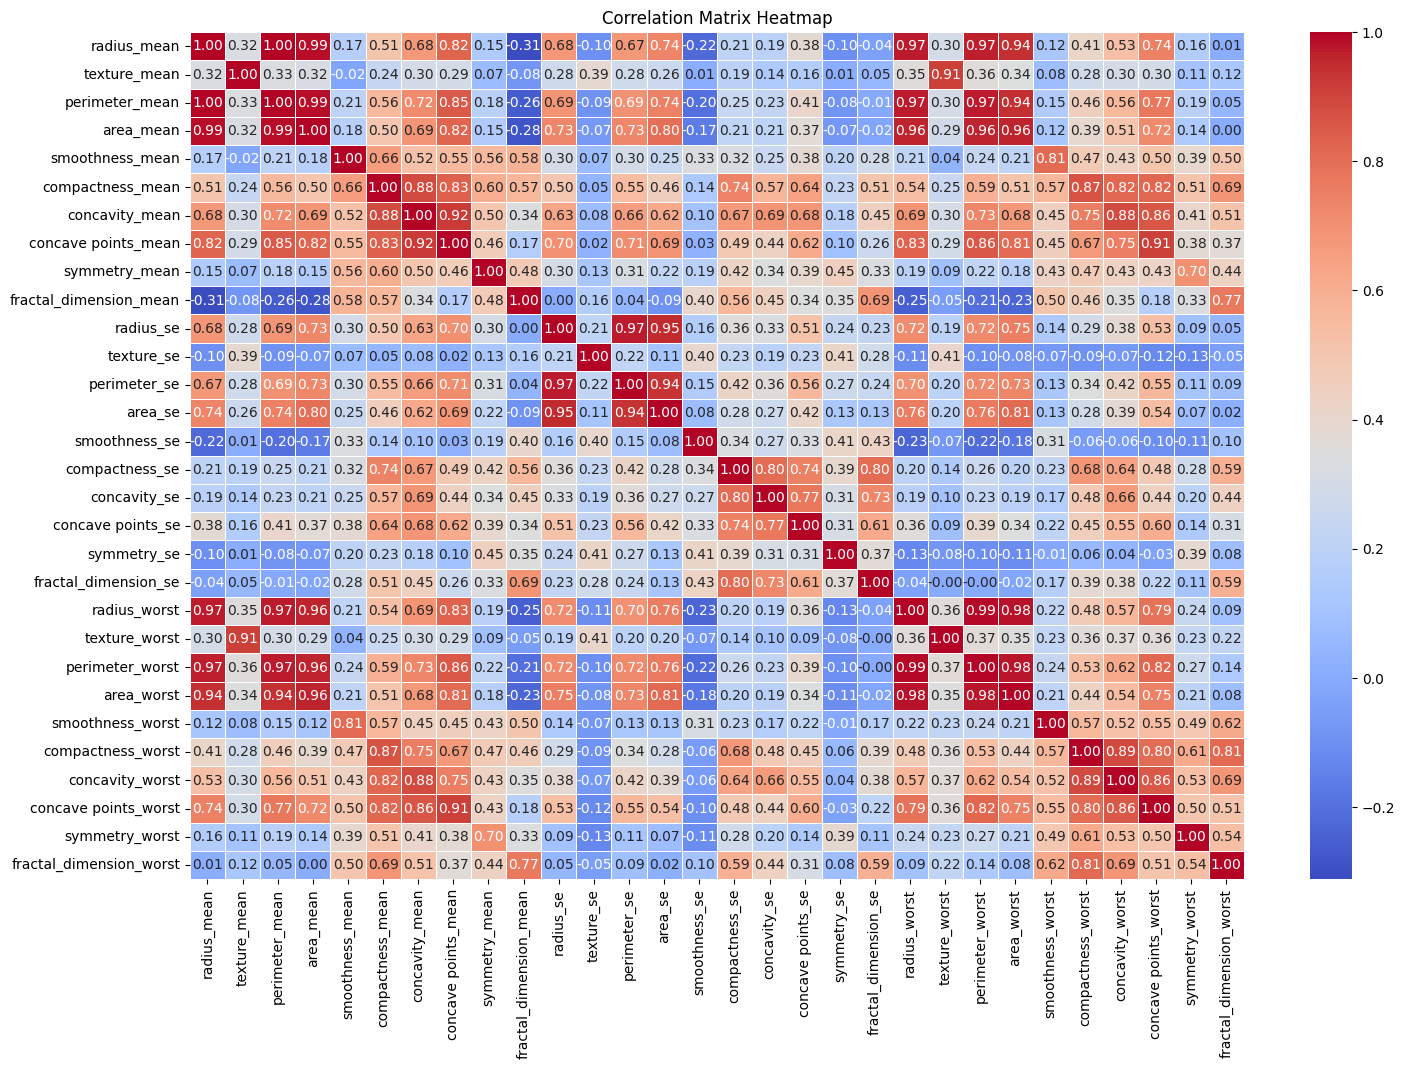

In [16]:
plt.figure(figsize=(17, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Multiple features show a strong correlation with one another

#### Find highly-correlated features

Between the two highly correlated features, drop the one with the higher average correlation with all the other features

In [17]:
# function to calc avg corr per feature:
def avg_corr(feature):
    sum = 0
    for col in data.columns:
        sum += abs(corr_matrix[feature][col])
    avg = sum / len(data.columns)
    return avg


Set the threshold for high correlation to 0.8

In [18]:
threshold = 0.8
cols_to_drop = set()

for feature1 in corr_matrix.columns:
    for feature2 in corr_matrix.index:
        if feature1 == feature2: # to stop at half of the matrix
            break

        corr_value = corr_matrix.loc[feature1, feature2]
        if abs(corr_value) > threshold:            
            if avg_corr(feature1) > avg_corr(feature2):
                cols_to_drop.add(feature1)
            else:
                cols_to_drop.add(feature2)

            print(f"corr({feature1}, {feature2}) = {corr_value:.2f}")

corr(perimeter_mean, radius_mean) = 1.00
corr(area_mean, radius_mean) = 0.99
corr(area_mean, perimeter_mean) = 0.99
corr(concavity_mean, compactness_mean) = 0.88
corr(concave points_mean, radius_mean) = 0.82
corr(concave points_mean, perimeter_mean) = 0.85
corr(concave points_mean, area_mean) = 0.82
corr(concave points_mean, compactness_mean) = 0.83
corr(concave points_mean, concavity_mean) = 0.92
corr(perimeter_se, radius_se) = 0.97
corr(area_se, area_mean) = 0.80
corr(area_se, radius_se) = 0.95
corr(area_se, perimeter_se) = 0.94
corr(concavity_se, compactness_se) = 0.80
corr(fractal_dimension_se, compactness_se) = 0.80
corr(radius_worst, radius_mean) = 0.97
corr(radius_worst, perimeter_mean) = 0.97
corr(radius_worst, area_mean) = 0.96
corr(radius_worst, concave points_mean) = 0.83
corr(texture_worst, texture_mean) = 0.91
corr(perimeter_worst, radius_mean) = 0.97
corr(perimeter_worst, perimeter_mean) = 0.97
corr(perimeter_worst, area_mean) = 0.96
corr(perimeter_worst, concave points_m

In [19]:
cols_to_drop

{'area_mean',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'texture_worst'}

Features to be dropped to reduce redundancy

#### Drop highly-correlated features

In [20]:
data = data.drop(columns = cols_to_drop)
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0       -2.073335       2.217515                2.255747   -0.565265   
1       -0.353632       0.001392               -0.868652   -0.876244   
2        0.456187       0.939685               -0.398008   -0.780083   
3        0.253732       2.867383                4.910919   -0.110409   
4       -1.151816      -0.009560               -0.562450   -0.790244   
..            ...            ...                     ...         ...   
564      0.721473      -0.312589               -0.931027    0.071025   
565      2.085134      -0.217664               -1.058611    2.260938   
566      2.045574      -0.809117               -0.895587   -0.257371   
567      2.336457       2.137194                1.043695    0.686088   
568      1.221792      -0.820070               -0.561032    0.383092   

      area_se  smoothness_se  concavity_se  concave points_se  symmetry_se  \
0    2.487578      -0.214002      0.724026           0.660820     1.148757   
1    0.742402      -0.605351     -0.440780           0.260162    -0.805450   
2    1.181336      -0.297005      0.213076           1.424827     0.237036   
3   -0.288378       0.689702      0.819518           1.115007     4.732680   
4    1.190357       1.483067      0.828471           1.144205    -0.361092   
..        ...            ...           ...                ...          ...   
564  2.604187       1.086384      0.666001           2.067178    -1.138416   
565  1.291565      -0.424010      0.252202           0.808431    -0.189161   
566  0.180698      -0.379342      0.510827           0.612157    -0.891416   
567  1.009503      -0.173000      1.302285           0.785721     0.326634   
568 -0.466152       0.049342     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.907083          1.307686        2.750622   
1               -0.099444         -0.375612       -0.243890   
2                0.293559          0.527407        1.152255   
3                2.047511          3.394275        6.046041   
4                0.499328          0.220556       -0.868353   
..                    ...               ...             ...   
564              0.167980          0.378365       -1.360158   
565             -0.490556         -0.691230       -0.531855   
566              0.036727         -0.809587       -1.104549   
567              0.904057          1.430427        1.919083   
568             -0.382754         -1.859019       -0.048138   

     fractal_dimension_worst  
0                   1.937015  
1                   0.281190  
2                   0.201391  
3                   4.935010  
4                  -0.397100  
..                       ...  
564                -0.709091  
565                -0.973978  
566                -0.318409  
567                 2.219635  
568                -0.751207  

[569 rows x 13 columns]

#### Plot the new correlation heatmap 

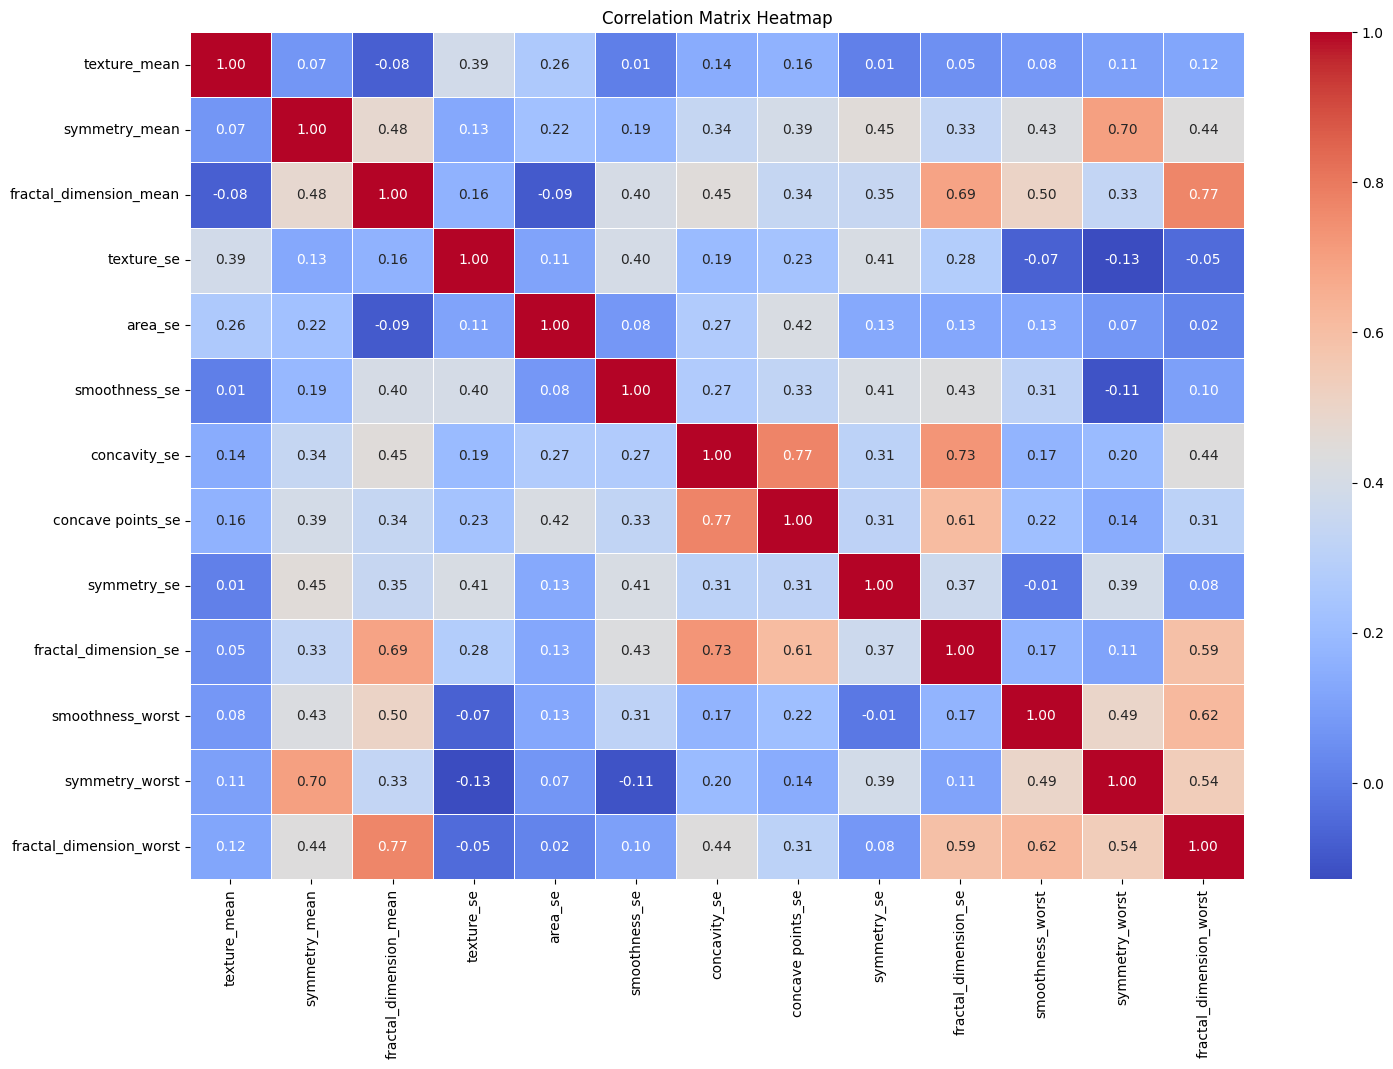

In [21]:
corr_matrix = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Outliers

#### Describe data before handling outliers

In [22]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean    texture_se  \
count  5.690000e+02   5.690000e+02            5.690000e+02  5.690000e+02   
mean   6.868164e-17   1.748260e-16            4.745277e-16 -1.123881e-16   
std    1.000880e+00   1.000880e+00            1.000880e+00  1.000880e+00   
min   -2.229249e+00  -2.744117e+00           -1.819865e+00 -1.554264e+00   
25%   -7.259631e-01  -7.032397e-01           -7.226392e-01 -6.948092e-01   
50%   -1.046362e-01  -7.162650e-02           -1.782793e-01 -1.974976e-01   
75%    5.841756e-01   5.307792e-01            4.709834e-01  4.665523e-01   
max    4.651889e+00   4.484751e+00            4.910919e+00  6.655279e+00   

            area_se  smoothness_se  concavity_se  concave points_se  \
count  5.690000e+02   5.690000e+02  5.690000e+02         569.000000   
mean  -1.311195e-16  -1.529727e-16  1.623384e-16           0.000000   
std    1.000880e+00   1.000880e+00  1.000880e+00           1.000880   
min   -7.378291e-01  -1.776065e+00 -1.057501e+00          -1.913447   
25%   -4.947542e-01  -6.240183e-01 -5.571612e-01          -0.674490   
50%   -3.477828e-01  -2.203352e-01 -1.990654e-01          -0.140496   
75%    1.067726e-01   3.683553e-01  3.367521e-01           0.472657   
max    1.104184e+01   8.029999e+00  1.207268e+01           6.649601   

        symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count  5.690000e+02          5.690000e+02      5.690000e+02    5.690000e+02   
mean   8.741299e-17         -6.243785e-18     -2.372638e-16    2.622390e-16   
std    1.000880e+00          1.000880e+00      1.000880e+00    1.000880e+00   
min   -1.532890e+00         -1.096968e+00     -2.682695e+00   -2.160960e+00   
25%   -6.516807e-01         -5.851185e-01     -6.912304e-01   -6.418637e-01   
50%   -2.194304e-01         -2.299405e-01     -4.684277e-02   -1.274095e-01   
75%    3.556925e-01          2.886421e-01      5.975448e-01    4.501382e-01   
max    7.071917e+00          9.851593e+00      3.955374e+00    6.046041e+00   

       fractal_dimension_worst  
count             5.690000e+02  
mean             -5.744282e-16  
std               1.000880e+00  
min              -1.601839e+00  
25%              -6.919118e-01  
50%              -2.164441e-01  
75%               4.507624e-01  
max               6.846856e+00

#### Scatter Plot

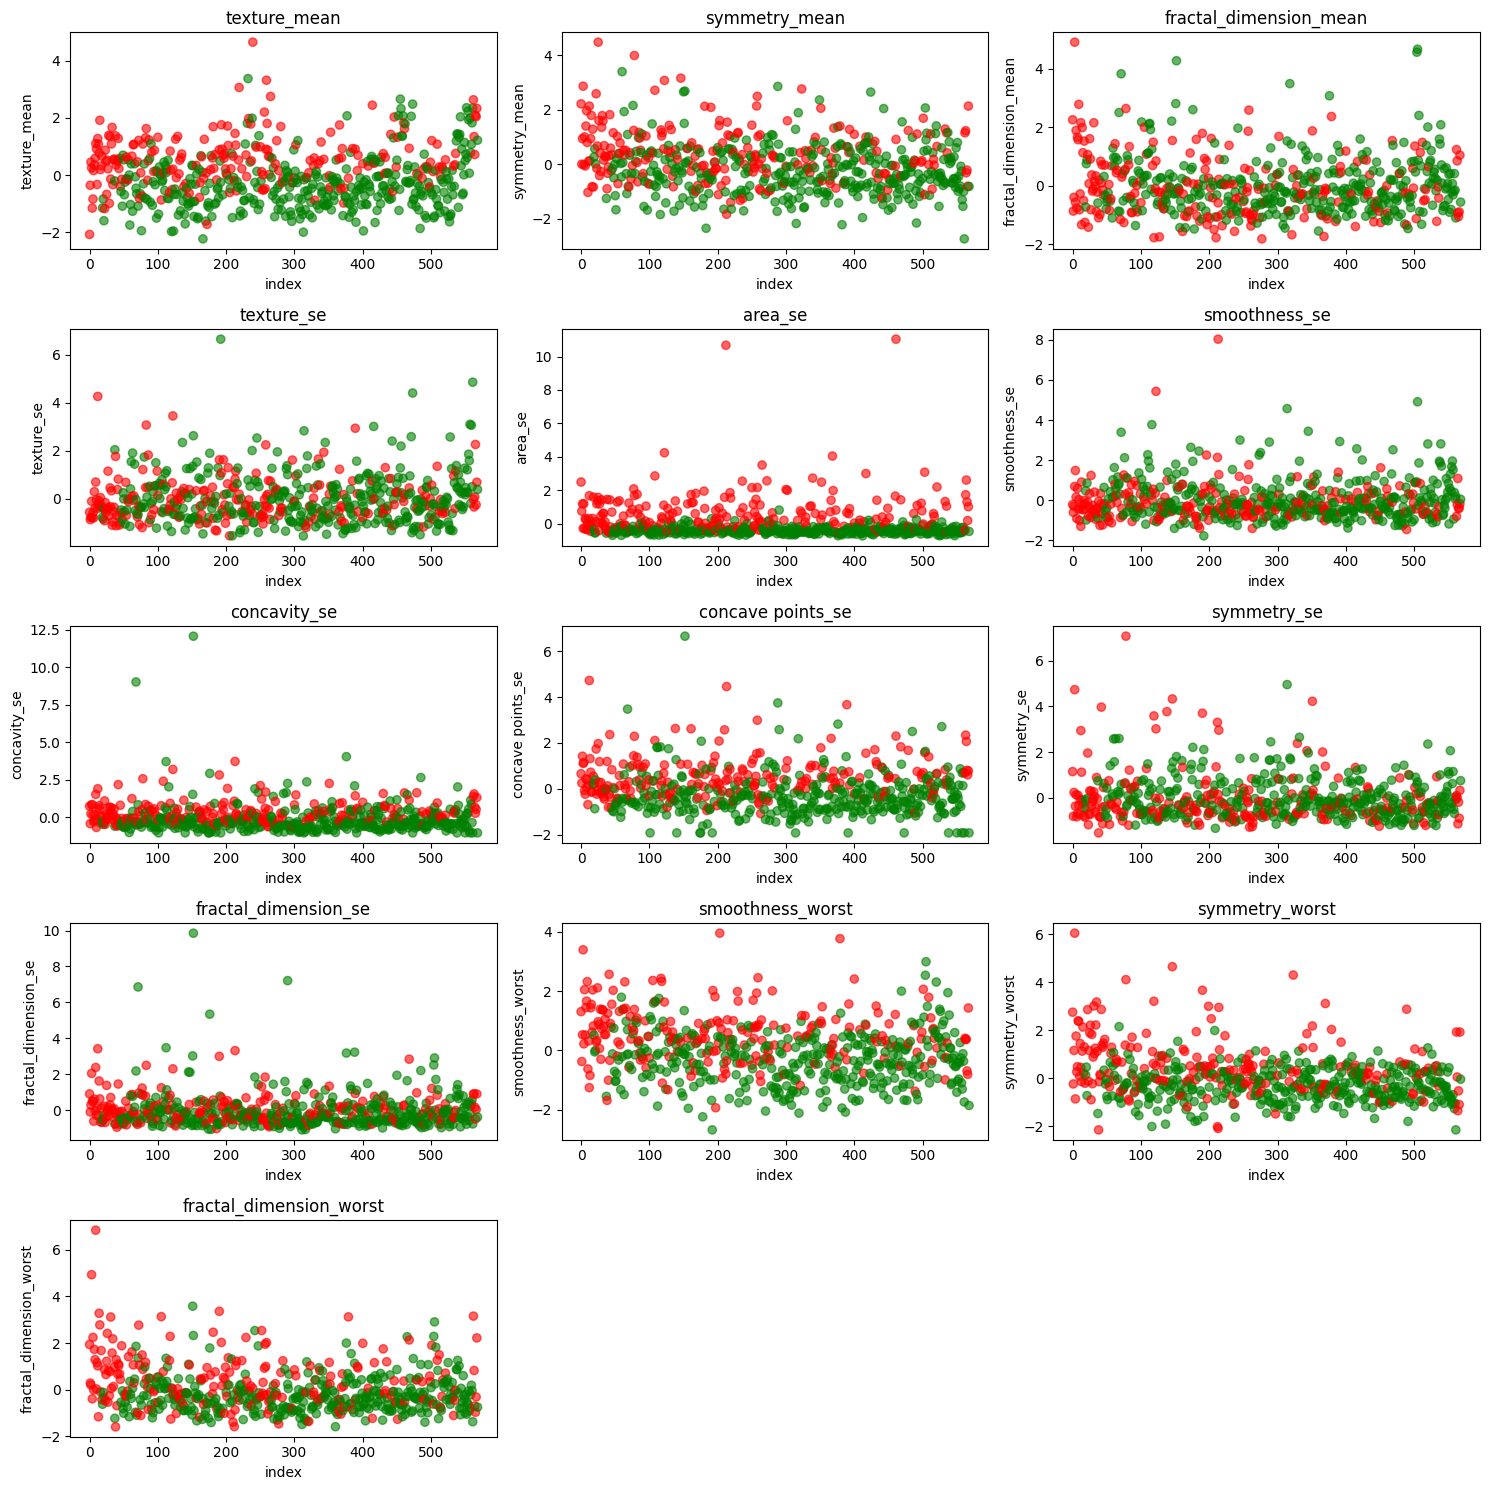

In [23]:
cols = 3
rows = int(np.ceil(len(data.columns) / cols))
fig = plt.figure(figsize=(15, rows * 3))

# Plot each feature
for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    
    # Map target class (diagnosis) to colors: 0 -> green, 1 -> red
    colors = df['diagnosis'].map({0: 'green', 1: 'red'})
    
    ax.scatter(range(len(data[feature])), data[feature], c=colors, alpha=0.6)
    ax.set_title(feature)
    ax.set_xlabel('index')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

The data points are colored according to the target class (diagnosis):

Benign (0) is represented by green

Malignant (1) is represented by red

#### Detect & Handle Outliers

After getting the outliers, we mark them as NULL, to handle them as missing values

In [24]:
for feature in data.columns:
    # Get outliers
    Q1 = data[feature].quantile(0.25)  
    Q3 = data[feature].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Mark outliers as null
    data.loc[outliers.index, feature] = np.nan

    # Print outliers for each feature
    print(f"{outliers[feature].count()} outliers detected in '{feature}':")
    print(outliers[feature])
    print("-" * 50)

7 outliers detected in 'texture_mean':
219    3.067156
232    3.378983
239    4.651889
259    3.320807
265    2.753002
455    2.659920
562    2.636649
Name: texture_mean, dtype: float64
--------------------------------------------------
15 outliers detected in 'symmetry_mean':
3      2.867383
22     2.589911
25     4.484751
60     3.400421
78     3.995524
108    2.717694
122    3.079138
146    3.163109
150    2.659279
152    2.688487
258    2.494987
288    2.860081
323    2.765157
424    2.651977
561   -2.744117
Name: symmetry_mean, dtype: float64
--------------------------------------------------
15 outliers detected in 'fractal_dimension_mean':
3      4.910919
9      2.783096
68     2.503828
71     3.827870
78     2.639918
151    2.808612
152    4.275833
176    2.603060
258    2.586049
318    3.491898
376    3.076540
379    2.367738
504    4.567859
505    4.671344
507    2.404595
Name: fractal_dimension_mean, dtype: float64
--------------------------------------------------
20 outlie

In [25]:
data.isnull().sum()

texture_mean                7
symmetry_mean              15
fractal_dimension_mean     15
texture_se                 20
area_se                    65
smoothness_se              30
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
smoothness_worst            7
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

These are the detected outliers, they are replace by NaN

area_se has the greatest number of outliers, about 11% of its total values

#### Describe data after removing outliers

In [26]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
count    562.000000     554.000000              554.000000  549.000000   
mean      -0.039979      -0.071613               -0.089385   -0.115804   
std        0.937440       0.877489                0.839198    0.783573   
min       -2.229249      -2.353466               -1.819865   -1.554264   
25%       -0.727708      -0.705978               -0.730436   -0.705514   
50%       -0.117435      -0.104485               -0.208758   -0.257371   
75%        0.551597       0.489706                0.419241    0.386721   
max        2.485389       2.363553                2.255747    2.193808   

          area_se  smoothness_se  concavity_se  concave points_se  \
count  504.000000     539.000000    547.000000         550.000000   
mean    -0.263712      -0.161516     -0.131472          -0.108446   
std      0.370418       0.682736      0.597913           0.801373   
min     -0.737829      -1.776065     -1.057501          -1.913447   
25%     -0.507790      -0.661186     -0.575066          -0.690184   
50%     -0.386066      -0.288671     -0.247475          -0.177804   
75%     -0.141352       0.259684      0.240431           0.395202   
max      0.949658       1.796413      1.671985           2.185591   

       symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count   542.000000            541.000000        562.000000      546.000000   
mean     -0.155958             -0.163789         -0.029413       -0.129427   
std       0.685811              0.568963          0.942153        0.769655   
min      -1.532890             -1.096968         -2.240829       -2.160960   
25%      -0.676199             -0.601383         -0.691230       -0.679882   
50%      -0.255149             -0.285543         -0.051226       -0.167045   
75%       0.228863              0.167980          0.565764        0.356711   
max       1.806213              1.596257          2.451803        2.027474   

       fractal_dimension_worst  
count               545.000000  
mean                 -0.130242  
std                   0.773029  
min                  -1.601839  
25%                  -0.719066  
50%                  -0.263547  
75%                   0.349906  
max                   2.130970

#### Use KNN-Imputer to impute missing values (outliers)

Give uniform weights to treat all neighbors with equal importance

In [27]:
imputer = KNNImputer(weights = 'uniform')
data[data.columns] = imputer.fit_transform(data[data.columns])

In [28]:
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0       -2.073335       2.217515                2.255747   -0.565265   
1       -0.353632       0.001392               -0.868652   -0.876244   
2        0.456187       0.939685               -0.398008   -0.780083   
3        0.253732       0.155462                0.046836   -0.110409   
4       -1.151816      -0.009560               -0.562450   -0.790244   
..            ...            ...                     ...         ...   
564      0.721473      -0.312589               -0.931027    0.071025   
565      2.085134      -0.217664               -1.058611    0.322856   
566      2.045574      -0.809117               -0.895587   -0.257371   
567      2.336457       2.137194                1.043695    0.686088   
568      1.221792      -0.820070               -0.561032    0.383092   

      area_se  smoothness_se  concavity_se  concave points_se  symmetry_se  \
0   -0.321821      -0.214002      0.724026           0.660820     1.148757   
1    0.742402      -0.605351     -0.440780           0.260162    -0.805450   
2    0.557852      -0.297005      0.213076           1.424827     0.237036   
3   -0.288378       0.689702      0.819518           1.115007    -0.069777   
4    0.156716       1.483067      0.828471           1.144205    -0.361092   
..        ...            ...           ...                ...          ...   
564  0.350640       1.086384      0.666001           2.067178    -1.138416   
565 -0.131594      -0.424010      0.252202           0.808431    -0.189161   
566  0.180698      -0.379342      0.510827           0.612157    -0.891416   
567  0.183955      -0.173000      1.302285           0.785721     0.326634   
568 -0.466152       0.049342     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.907083          1.307686        1.139636   
1               -0.099444         -0.375612       -0.243890   
2                0.293559          0.527407        1.152255   
3                0.267687          0.749217       -0.115114   
4                0.499328          0.220556       -0.868353   
..                    ...               ...             ...   
564              0.167980          0.378365       -1.360158   
565             -0.490556         -0.691230       -0.531855   
566              0.036727         -0.809587       -1.104549   
567              0.904057          1.430427        1.919083   
568             -0.382754         -1.859019       -0.048138   

     fractal_dimension_worst  
0                   1.937015  
1                   0.281190  
2                   0.201391  
3                   0.230872  
4                  -0.397100  
..                       ...  
564                -0.709091  
565                -0.973978  
566                -0.318409  
567                 0.936537  
568                -0.751207  

[569 rows x 13 columns]

#### Describe data after handling outliers

In [29]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
count    569.000000     569.000000              569.000000  569.000000   
mean      -0.035088      -0.054011               -0.059032   -0.097957   
std        0.933015       0.877368                0.850243    0.777403   
min       -2.229249      -2.353466               -1.819865   -1.554264   
25%       -0.725963      -0.703240               -0.722639   -0.694809   
50%       -0.104636      -0.071627               -0.178279   -0.197498   
75%        0.537634       0.516175                0.470983    0.404865   
max        2.485389       2.363553                2.255747    2.193808   

          area_se  smoothness_se  concavity_se  concave points_se  \
count  569.000000     569.000000    569.000000         569.000000   
mean    -0.231252      -0.130518     -0.104282          -0.084164   
std      0.367687       0.681736      0.606396           0.801527   
min     -0.737829      -1.776065     -1.057501          -1.913447   
25%     -0.494754      -0.624018     -0.557161          -0.674490   
50%     -0.352711      -0.224002     -0.200060          -0.143740   
75%     -0.035711       0.311020      0.286950           0.455787   
max      0.949658       1.796413      1.671985           2.185591   

       symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count   569.000000            569.000000        569.000000      569.000000   
mean     -0.134157             -0.128995         -0.020926       -0.094080   
std       0.680818              0.579293          0.944023        0.778774   
min      -1.532890             -1.096968         -2.240829       -2.160960   
25%      -0.651681             -0.585118         -0.691230       -0.641864   
50%      -0.220641             -0.249231         -0.046843       -0.127409   
75%       0.272148              0.257626          0.597545        0.424254   
max       1.806213              1.596257          2.451803        2.027474   

       fractal_dimension_worst  
count               569.000000  
mean                 -0.082527  
std                   0.794977  
min                  -1.601839  
25%                  -0.691912  
50%                  -0.216444  
75%                   0.438017  
max                   2.130970

#### Scatter Plot after handling outliers

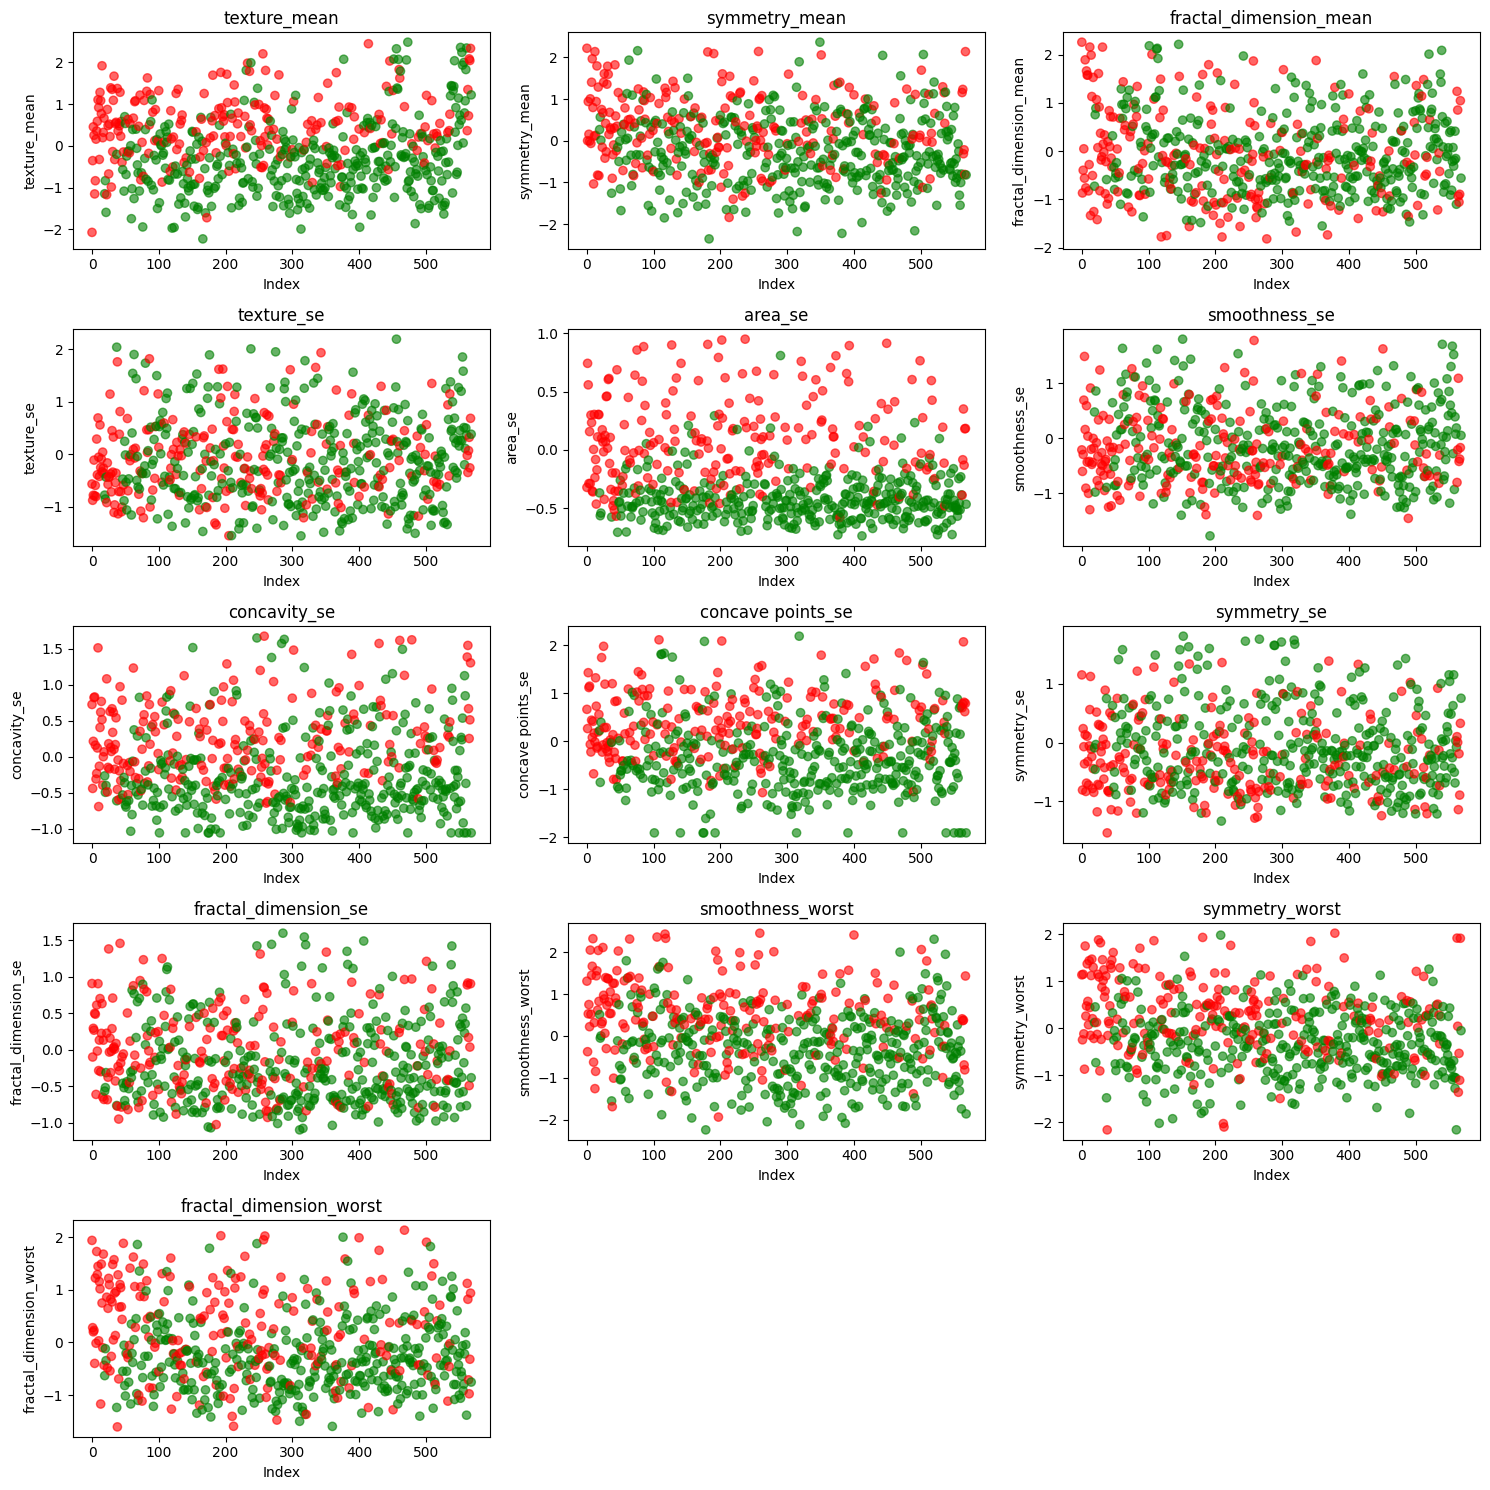

In [30]:
cols = 3
rows = int(np.ceil(len(data.columns) / cols))
fig = plt.figure(figsize=(15, rows * 3))

for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    
    # Map target class (diagnosis) to colors: 0 -> green, 1 -> red
    colors = df['diagnosis'].map({0: 'green', 1: 'red'})
    
    ax.scatter(range(len(data[feature])), data[feature], c=colors, alpha=0.6)
    ax.set_title(feature)
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

### Get target column back to the dataframe

In [31]:
data['diagnosis'] = df['diagnosis']
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0       -2.073335       2.217515                2.255747   -0.565265   
1       -0.353632       0.001392               -0.868652   -0.876244   
2        0.456187       0.939685               -0.398008   -0.780083   
3        0.253732       0.155462                0.046836   -0.110409   
4       -1.151816      -0.009560               -0.562450   -0.790244   
..            ...            ...                     ...         ...   
564      0.721473      -0.312589               -0.931027    0.071025   
565      2.085134      -0.217664               -1.058611    0.322856   
566      2.045574      -0.809117               -0.895587   -0.257371   
567      2.336457       2.137194                1.043695    0.686088   
568      1.221792      -0.820070               -0.561032    0.383092   

      area_se  smoothness_se  concavity_se  concave points_se  symmetry_se  \
0   -0.321821      -0.214002      0.724026           0.660820     1.148757   
1    0.742402      -0.605351     -0.440780           0.260162    -0.805450   
2    0.557852      -0.297005      0.213076           1.424827     0.237036   
3   -0.288378       0.689702      0.819518           1.115007    -0.069777   
4    0.156716       1.483067      0.828471           1.144205    -0.361092   
..        ...            ...           ...                ...          ...   
564  0.350640       1.086384      0.666001           2.067178    -1.138416   
565 -0.131594      -0.424010      0.252202           0.808431    -0.189161   
566  0.180698      -0.379342      0.510827           0.612157    -0.891416   
567  0.183955      -0.173000      1.302285           0.785721     0.326634   
568 -0.466152       0.049342     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.907083          1.307686        1.139636   
1               -0.099444         -0.375612       -0.243890   
2                0.293559          0.527407        1.152255   
3                0.267687          0.749217       -0.115114   
4                0.499328          0.220556       -0.868353   
..                    ...               ...             ...   
564              0.167980          0.378365       -1.360158   
565             -0.490556         -0.691230       -0.531855   
566              0.036727         -0.809587       -1.104549   
567              0.904057          1.430427        1.919083   
568             -0.382754         -1.859019       -0.048138   

     fractal_dimension_worst  diagnosis  
0                   1.937015          1  
1                   0.281190          1  
2                   0.201391          1  
3                   0.230872          1  
4                  -0.397100          1  
..                       ...        ...  
564                -0.709091          1  
565                -0.973978          1  
566                -0.318409          1  
567                 0.936537          1  
568                -0.751207          0  

[569 rows x 14 columns]

## Save Preprocessed Data to CSV File

In [32]:
data.to_csv("breast-cancer_cleaned.csv", index=False)